In [1]:
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.layers import Reshape, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import numpy as np
from PIL import Image
import os
from matplotlib import pyplot as plt

%matplotlib inline
import cv2

c:\users\sun tex\appdata\local\programs\python\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
def training_image_data():
    train_images=[]
    PATH = 'D:\\SARANYA-PhD\\Dataset\\Training_set'
    # for each folder (holding a different set of fruits)
    for directory in os.listdir(PATH):
        # for each image in the folder
        DATA_PATH=PATH + '\\' + directory
        for image in os.listdir(DATA_PATH):
            img = cv2.imread(os.path.join(DATA_PATH,image))  # convert to array
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            dim=(64,64)
            new_array=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            new_array=np.array(new_array)
            #print(len(new_array))
            if directory=="Apple":
                ohl=np.array([1,0,0,0,0,0,0,0])
            elif directory=="Apple2":
                ohl=np.array([0,1,0,0,0,0,0,0])
            elif directory=="Apple3":
                ohl=np.array([0,0,1,0,0,0,0,0])
            elif directory=="Apple4":
                ohl=np.array([0,0,0,1,0,0,0,0])
            elif directory=="Apple5":
                ohl=np.array([0,0,0,0,1,0,0,0])
            elif directory=="Banana":
                ohl=np.array([0,0,0,0,0,1,0,0])
            elif directory=="Orange":
                ohl=np.array([0,0,0,0,0,0,1,0])
            elif directory=="Pomegranate":
                ohl=np.array([0,0,0,0,0,0,0,1])
            train_images.append([new_array,ohl])
        
    print(len(train_images))
    return(train_images)    
        

In [4]:
def testing_image_data():
    test_images=[]
    PATH = 'D:\\SARANYA-PhD\\Dataset\\Testing_set'
    # for each folder (holding a different set of fruits)
    for directory in os.listdir(PATH):
        # for each image in the folder
        DATA_PATH=PATH + '\\' + directory
        for image in os.listdir(DATA_PATH):
            img = cv2.imread(os.path.join(DATA_PATH,image))  # convert to array
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            dim=(64,64)
            new_array=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            new_array=np.array(new_array)
            #print(len(new_array))
            if directory=="Apple":
                ohl=np.array([1,0,0,0,0,0,0,0])
            elif directory=="Apple2":
                ohl=np.array([0,1,0,0,0,0,0,0])
            elif directory=="Apple3":
                ohl=np.array([0,0,1,0,0,0,0,0])
            elif directory=="Apple4":
                ohl=np.array([0,0,0,1,0,0,0,0])
            elif directory=="Apple5":
                ohl=np.array([0,0,0,0,1,0,0,0])
            elif directory=="Banana":
                ohl=np.array([0,0,0,0,0,1,0,0])
            elif directory=="Orange":
                ohl=np.array([0,0,0,0,0,0,1,0])
            elif directory=="Pomegranate":
                ohl=np.array([0,0,0,0,0,0,0,1])
            test_images.append([new_array,ohl])
        
    print(len(test_images))
    return(test_images)    

In [12]:
training_images = training_image_data()
testing_images = testing_image_data()

tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,3)
tr_lbl_data = np.array([i[1] for i in training_images])

tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,3)
tst_lbl_data = np.array([i[1] for i in testing_images])

3610
1226


In [15]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=[64,64,3]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                200736    
__________

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(tr_img_data, tr_lbl_data,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(tst_img_data, tst_lbl_data))

Train on 3610 samples, validate on 1226 samples
Epoch 1/5
3610/3610 [==============================] - 173s - loss: 13.4986 - acc: 0.1349 - val_loss: 12.2153 - val_acc: 0.1411
Epoch 2/5
3610/3610 [==============================] - 243s - loss: 4.4643 - acc: 0.1529 - val_loss: 2.0772 - val_acc: 0.1338
Epoch 3/5
3610/3610 [==============================] - 380s - loss: 2.0887 - acc: 0.1349 - val_loss: 2.0749 - val_acc: 0.1338
Epoch 4/5
3610/3610 [==============================] - 491s - loss: 2.0767 - acc: 0.1366 - val_loss: 2.0731 - val_acc: 0.1338
Epoch 5/5
3610/3610 [==============================] - 837s - loss: 2.0786 - acc: 0.1238 - val_loss: 2.0717 - val_acc: 0.1338


In [17]:
score = model.evaluate(tr_img_data, tr_lbl_data, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
        


Test loss: 2.071266007225269
Test accuracy: 0.1362880886426593


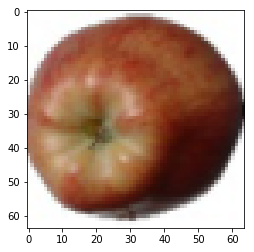

In [50]:
import pylab as plt
plt.imshow(tst_img_data[122].reshape(64,64))
plt.show()



In [ ]:
import numpy as np
prediction = model.predict(x_test[122:123])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])